# Test / Demonstrate the Data Embedding Simulation Library

In [1]:
from code_book_embed import *
ms.use('seaborn-muted')
%matplotlib inline

Testing Visualizations

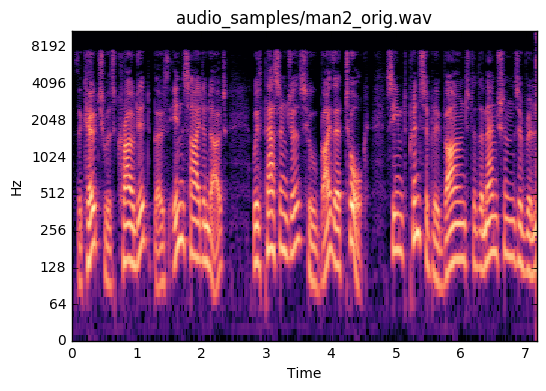

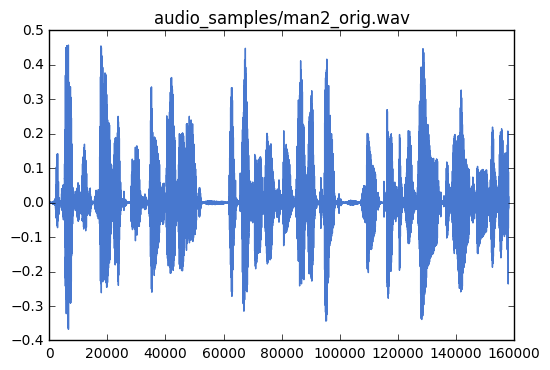

In [2]:
path_to_source = "audio_samples/man2_orig.wav"

view_spectrogram(path_to_source)
view_sample(path_to_source)

Testing Embedding: Original codebook waveforms, without editing them

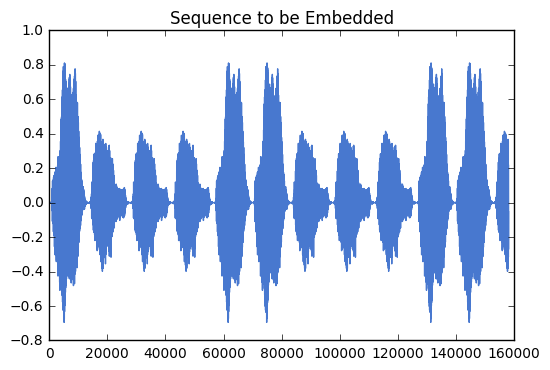

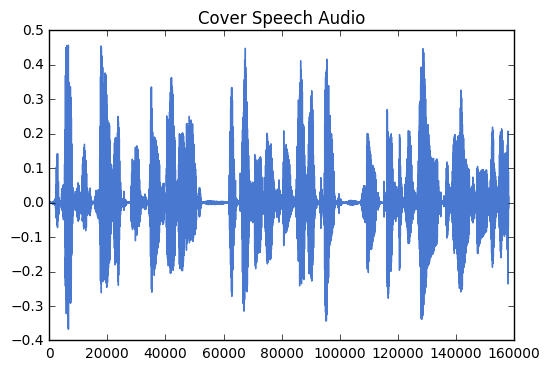

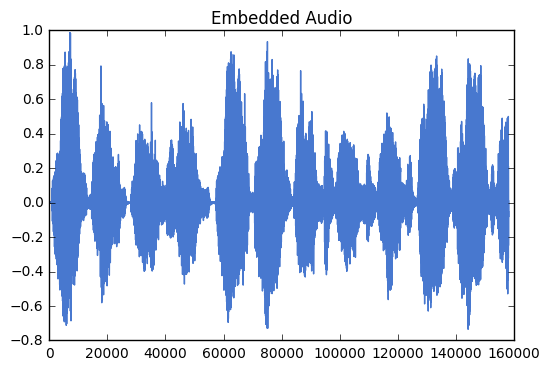

In [3]:
sample_path_list = ['speech_samples/pronunciation_en_zero2.mp3', 'speech_samples/pronunciation_en_one.mp3']

E = Embed(path_to_source, sample_path_list, [0,1], [0,1,1,1,0])
embed, num_total_digits = E.get_embedded_audio(plot=True)

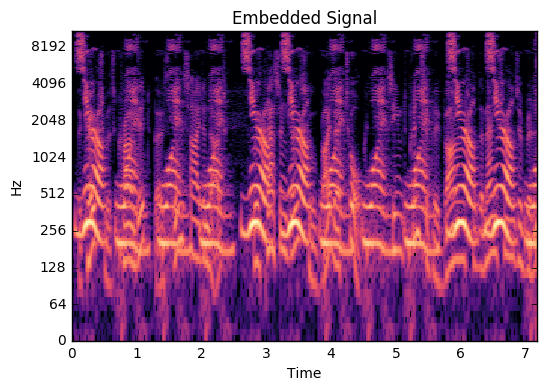

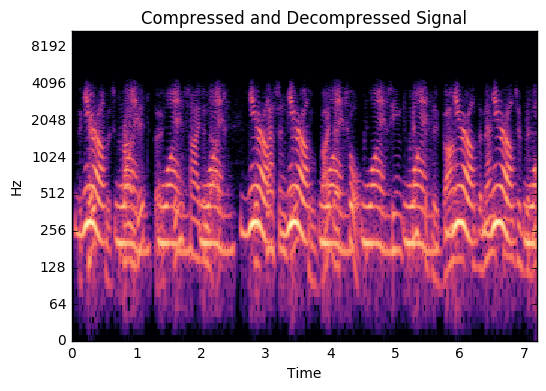

In [4]:
d_embed, sr = compress_and_decompress(embed, "compression_samples/", plot=True)

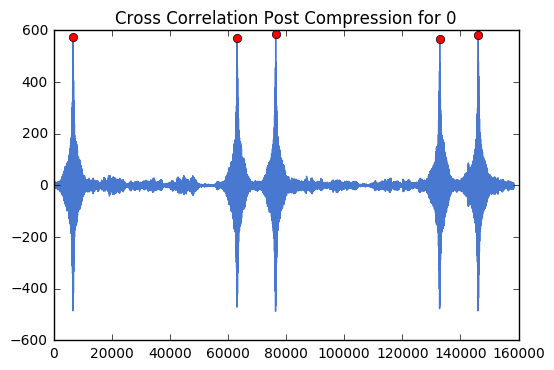

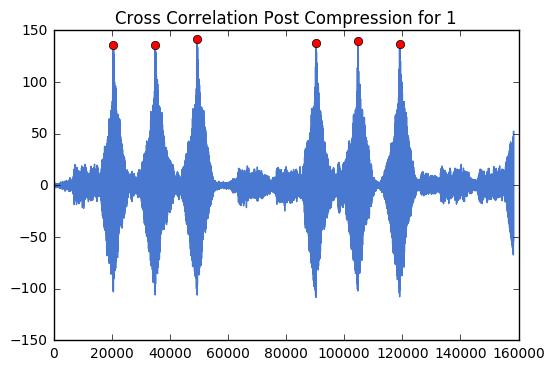

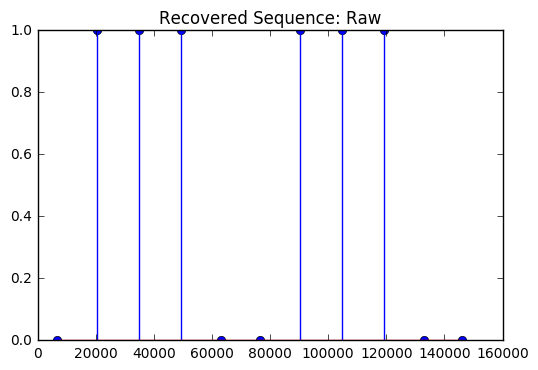

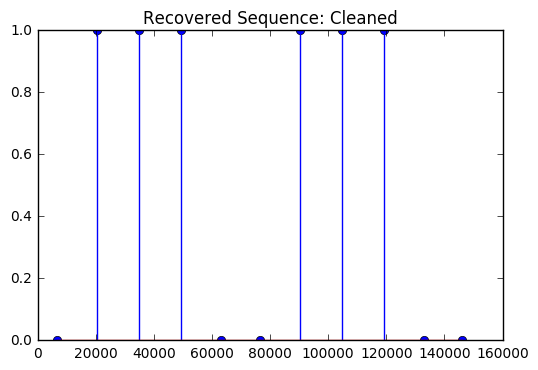

[0 1 1 1 0 0 1 1 1 0 0]


In [5]:
w = E.get_data_timeseries()
R = Recover(d_embed, w, [0,1], [0,1,1,1,0], num_total_digits)
final_sequence = R.get_bit_sequence(plot=True, thres=0.75)
print final_sequence

Testing Embedding with waveform modification:

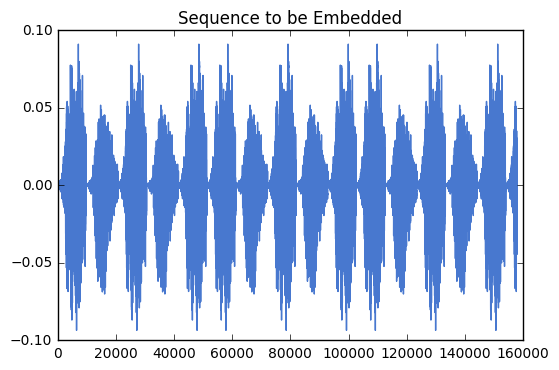

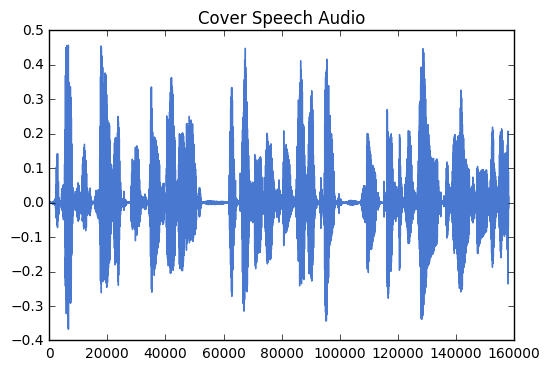

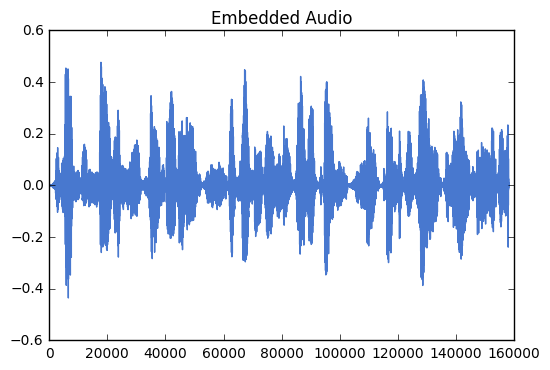

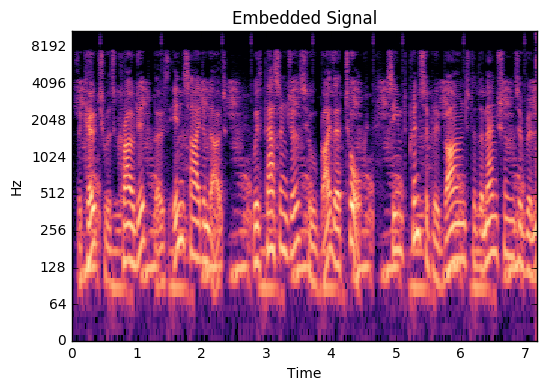

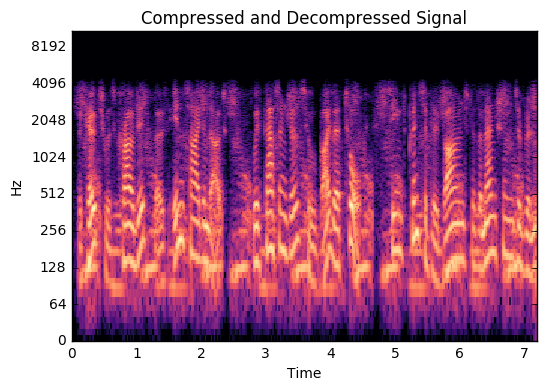

In [51]:
path_to_source = "audio_samples/man2_orig.wav"
E2 = Embed(path_to_source, sample_path_list, [0,1], [0,1,0,1,0])

# mess around with the codebook waveforms before embedding
E2.truncate(0.75, idx_list=[0,1])
E2.energy(0.2, idx_list=[0])
E2.energy(0.2, idx_list=[1])
E2.pitch_shift(-15, idx_list=[0])
E2.pitch_shift(-15, idx_list=[1])

embed2, num_total_digits = E2.get_embedded_audio(plot=True)
d_embed2, sr = compress_and_decompress(embed2, "compression_samples/", plot=True)

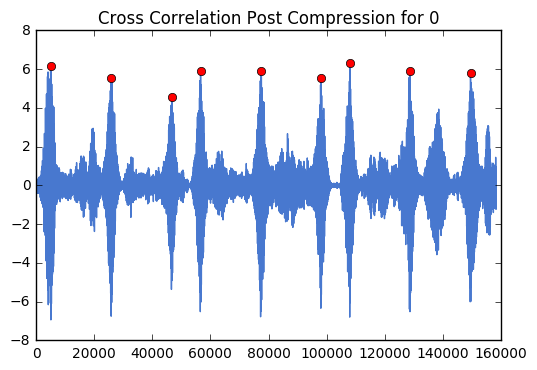

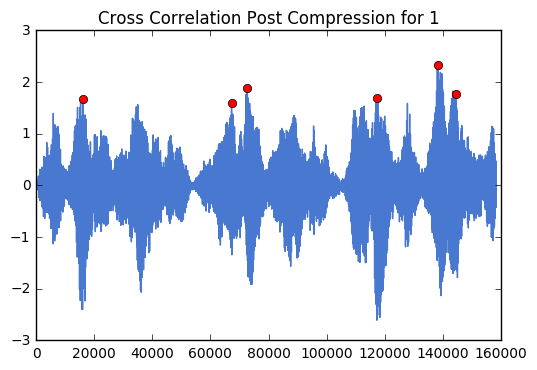

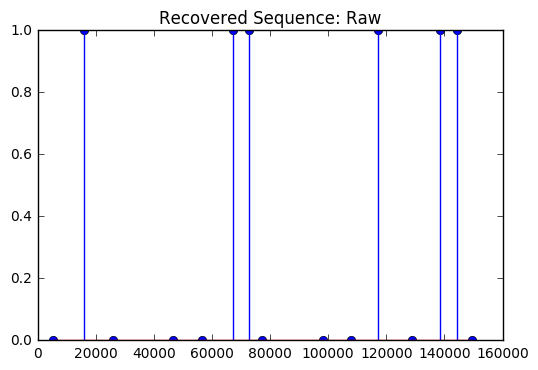

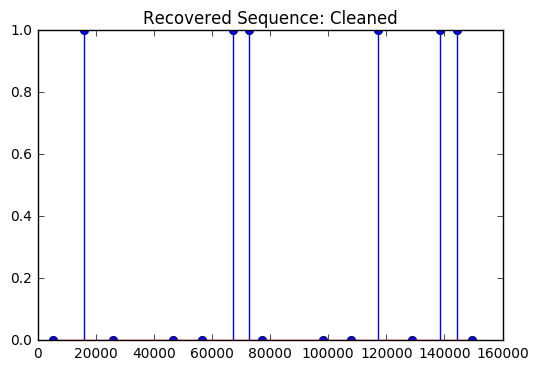

raw  [0 1 0 0 0 1 1 0 0 0 1 0 1 1 0]
Predicted Sequence:  [0 1 0 0 0 1 1 0 0 0 1 0 1 1 0]
Reference Sequence:  [0 1 0 1 0 0 1 0 1 0 0 1 0 1 0]
0.6


In [52]:
# get the timeseries of the the original waveforms and recover

w2 = E2.get_data_timeseries()
# embedded sequence length
R2 = Recover(d_embed2, w2, [0,1], [0,1,0,1,0], num_total_digits)
final_sequence2 = R2.get_bit_sequence(thres=0.85, plot=True)
print "raw ", final_sequence2
print R2.get_recovery_estimate(final_sequence2, dump=True)

In [53]:
# listen to compressed version
Audio(d_embed2, rate=sr)